In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('F:/ml-data/train_7w.csv')
data.head()

,zjhm,sfdqjt,nl,hyzk,whcd,zjxy,sfdb,sfsb,sfgjj,sfyfc,...,jbcs,fzcs,zhsdrs,bgrzcs,tzsdrs,lycs,cjsqcs,xfcs,tlysdrs,sfsd
0,6.59E+17,0,33,10,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.10E+17,0,49,10,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.10E+17,0,48,20,20,0,0,1,0,1,...,0,0,0,2,0,0,0,0,0,0
3,1.20E+17,0,53,20,20,0,0,1,0,0,...,0,3,0,1,0,0,0,0,0,1
4,1.20E+17,0,41,20,41,0,0,1,0,1,...,0,0,0,4,0,0,0,0,0,0


In [4]:
data = data.drop(['zjhm'], axis = 1)

In [5]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [6]:
x.shape

(70000, 43)

In [7]:
y.shape

(70000,)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.ensemble import RandomForestRegressor

In [11]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, test_size= 0.2)

In [12]:
train_x.shape

(56000, 43)

In [13]:
test_x.shape

(14000, 43)

In [14]:
rf_reg = RandomForestRegressor(random_state=1)
rf_reg.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [15]:
features = train_x.columns
importances = rf_reg.feature_importances_
indices = np.argsort(importances[0:20])    # 取前20个重要的特征

In [21]:
importances

array([7.23955827e-04, 1.01474717e-01, 1.50532815e-02, 2.82132303e-02,
       4.37562765e-03, 2.29898359e-03, 5.74668420e-03, 2.66431541e-03,
       1.02064008e-02, 9.45019786e-03, 7.07875754e-03, 2.13294547e-03,
       3.13277579e-03, 2.31195410e-06, 4.25042721e-03, 3.27509073e-03,
       8.56468558e-04, 8.77612345e-03, 2.33021485e-04, 2.20946783e-05,
       0.00000000e+00, 5.81879223e-04, 8.69465396e-04, 1.22136841e-03,
       7.19255847e-01, 0.00000000e+00, 5.77871411e-04, 8.08651536e-04,
       2.42780725e-04, 8.84568439e-05, 1.74226452e-04, 1.11603637e-03,
       4.55921466e-03, 1.14265133e-05, 1.41596740e-03, 9.13402323e-03,
       0.00000000e+00, 4.34119108e-02, 8.32050529e-04, 3.71095209e-07,
       5.71915554e-03, 1.18863347e-05, 0.00000000e+00])

In [23]:
import matplotlib.pyplot as plt

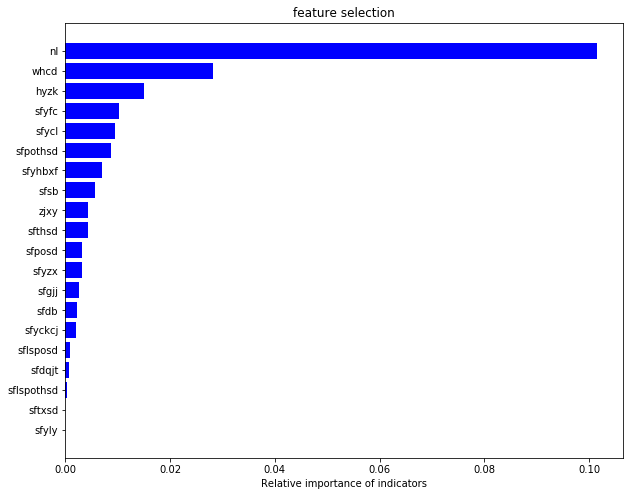

In [28]:
plt.figure(figsize=(10, 8))
plt.title('feature selection')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance of indicators')
plt.show()


In [37]:
de_train_x = train_x.iloc[:, indices]

In [38]:
de_train_x.shape

(56000, 20)

In [40]:
de_test_x = test_x.iloc[:, indices]
de_test_x.shape

(14000, 20)

In [41]:
scaler = StandardScaler()

In [42]:
scaler_train_x = scaler.fit_transform(de_train_x)
scaler_test_x = scaler.fit(de_test_x)

#### 分类

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, DMatrix
from sklearn.model_selection import cross_val_score

In [45]:
### 朴素贝叶斯
gnb = GaussianNB()
### 逻辑回归
logic = LogisticRegression(max_iter=2000)
### K近邻
knn = KNeighborsClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=1)

### XGB
xgb = XGBClassifier(random_state = 1)

model_list = [gnb, logic, knn, rf , xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, scaler_train_x, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())



GaussianNB(priors=None, var_smoothing=1e-09)
[0.58491071 0.53428571 0.58517857 0.58339286 0.58705357]
0.5749642857142858


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.69330357 0.6925     0.689375   0.69741071 0.70223214]
0.6949642857142857


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.76892857 0.76732143 0.76669643 0.76928571 0.77294643]
0.7690357142857143


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

### PCA

In [60]:
FERTURE_SIZE = 30

In [61]:
pca = PCA(n_components= FERTURE_SIZE)  ### 降到20个特征

In [62]:
scaler = StandardScaler()

In [63]:
scaler_train_x = scaler.fit_transform(train_x)
scaler_test_x = scaler.transform(test_x)

In [64]:
pca.fit(scaler_train_x)
pca_train_x = pca.transform(scaler_train_x)
pca_test_x = pca.transform(scaler_test_x)

In [65]:
scaler_train_x.shape

(56000, 43)

In [66]:
pca_train_x.shape

(56000, 30)

In [67]:
scaler_test_x.shape

(14000, 43)

In [68]:
pca_test_x.shape

(14000, 30)

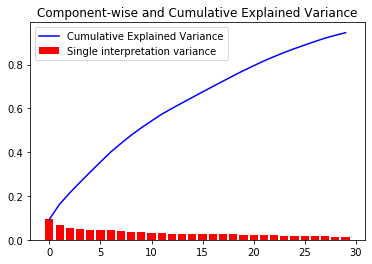

In [69]:
plt.bar(range(FERTURE_SIZE), pca.explained_variance_ratio_ ,fc='red', label='Single interpretation variance')
plt.plot(range(FERTURE_SIZE), np.cumsum(pca.explained_variance_ratio_),color='blue', label='Cumulative Explained Variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend()
plt.show()


In [70]:
### 朴素贝叶斯
gnb = GaussianNB()
### 逻辑回归
logic = LogisticRegression(max_iter=2000)
### K近邻
knn = KNeighborsClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=1)

### XGB
xgb = XGBClassifier(random_state = 1)

model_list = [gnb, logic, knn, rf , xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, pca_train_x, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())



GaussianNB(priors=None, var_smoothing=1e-09)
[0.73035714 0.72526786 0.72330357 0.73321429 0.72696429]
0.7278214285714285


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.92482143 0.92       0.91241071 0.91642857 0.92285714]
0.9193035714285716


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.91392857 0.90982143 0.90473214 0.91160714 0.91410714]
0.9108392857142856


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

### ICA

In [76]:
FERTURE_SIZE = 30
ica = FastICA(n_components=FERTURE_SIZE, random_state=12, max_iter=5000) 

In [81]:
ica.fit(scaler_train_x)
ica_train_x = ica.transform(scaler_train_x)
ica_test_x = ica.transform(scaler_test_x)

e:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


In [82]:
### 朴素贝叶斯
gnb = GaussianNB()
### 逻辑回归
logic = LogisticRegression(max_iter=2000)
### K近邻
knn = KNeighborsClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=1)

### XGB
xgb = XGBClassifier(random_state = 1)

model_list = [gnb, logic, knn, rf , xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, ica_train_x, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())



GaussianNB(priors=None, var_smoothing=1e-09)
[0.76571429 0.77330357 0.75303571 0.75964286 0.75785714]
0.7619107142857142


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.91839286 0.91767857 0.90955357 0.911875   0.91741071]
0.9149821428571429


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.91482143 0.90696429 0.90491071 0.910625   0.9125    ]
0.9099642857142858


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

### 前向特征选择

In [83]:
from sklearn.feature_selection import f_regression

In [84]:
METRI_SCORE = 10

In [86]:
fr = f_regression(scaler_train_x , train_y)

e:\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
e:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
e:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
e:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [94]:
cols = train_x.columns
col = []
col_idx = []
for i in range(0,len(cols)-1):
    if fr[0][i] >=METRI_SCORE:
        col.append(cols[i])
        col_idx.append(i)


In [96]:
de_train_x1 = train_x.iloc[:, col_idx]
de_test_x1 = test_x.iloc[:, col_idx]

In [97]:
de_train_x1.shape

(56000, 33)

In [98]:
de_test_x1.shape

(14000, 33)

In [99]:
### 朴素贝叶斯
gnb = GaussianNB()
### 逻辑回归
logic = LogisticRegression(max_iter=2000)
### K近邻
knn = KNeighborsClassifier()
### 随机森林
rf = RandomForestClassifier(random_state=1)

### XGB
xgb = XGBClassifier(random_state = 1)

model_list = [gnb, logic, knn, rf , xgb]
for model in model_list:
    print('\n')
    print(model)
    cv = cross_val_score(model, de_train_x1, train_y, cv = 5)  ## 交差验证 分成5分
    print(cv)
    print(cv.mean())



GaussianNB(priors=None, var_smoothing=1e-09)
[0.91276786 0.85982143 0.87660714 0.89982143 0.888125  ]
0.8874285714285716


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.92464286 0.92017857 0.91196429 0.91660714 0.92285714]
0.9192500000000001


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[0.87741071 0.879375   0.87955357 0.87892857 0.87857143]
0.8787678571428572


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample